# Тестовое задание для стажеров в команду Data Science IDP

# Задание 1
Данная задача относится к типу задач Intelligent Document Processing (IDP), а именно к задаче распознавания именованных сущностей (Named Entity Recognition). Анализ именованных сущностей происходит относительно 5 классов: EVT (Event, событие, мероприятие), ORG (Organization, организация), PER (Person, человек, персона, известная личность), PRO (Product, названия брендов, СМИ, документов, указ, договоров) и LOC (Location). 

# Задание 2
Реализуйте чтение датасета в pandas DataFrame с обязательными колонками "document_id", "document_text", "entity", "gold_answer". Выведите шапку датафрейма.

In [1]:
import pandas as pd
import numpy as np
import os
import re
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
df = pd.DataFrame(columns=['document_id',
                           'document_text',
                           'entity',
                           'gold_answer'])

df

,document_id,document_text,entity,gold_answer


# Задание 3
Напишите функцию, которая принимает на вход строку датафрейма и выдает текст входного сообщения для LLM.

Чтобы привести вывод GigaChat'а к правильному виду, необходимо привесту ему какой-нибудь пример. В качестве примера я решил взять текст статьи ru-1161 и аннотацию из тестового корпуса датасета Balto-Slavic Natural Language Processing 2019.

In [3]:
prompt_core = {
'query':
"""ru-1161
Экс-глава МИД Великобритании Борис Джонсон впервые объяснил, почему ушел в отставку, отметив, что больше не мог оставаться в правительстве, понимая, что его взгляды относительно Brexit не разделяют большинство членов парламента. Об этом он написал в открытом письме премьеру Терезе Мэй, передает ONLINE.UA со ссылкой на ВВС. Кроме того, он добавил, что Великобритания "определенно движется к статусу колонии" ЕС, поскольку берет на себя определенные обязательства, не имея при этом возможности влиять на действия Евросоюза.
"Brexit должен был стать возможностью и надеждой. Это был шанс сделать все по-другому, быть более динамичными и максимизировать преимущества Великобритании как открытой глобальной экономики. Эта мечта умирает, задушенная собственными сомнениями ", — написал Джонсон.
Премьер-министр Великобритании Тереза Мэй отреагировала на письмо дипломата — она поблагодарила Джонсона за работу и отметила, что ее разочаровал этот шаг. "Я немного удивлена таким решением после продуктивного обсуждения и формирования детальной и комплексной позиции по Brexit" , — заявила Мэй. Как сообщал ONLINE.UA, который 9-го июля подал в отставку.""",
'response':
"""ru-1161
Brexit	Brexit	EVT	EVT-Brexit
ONLINE.UA	ONLINE.UA	PRO	PRO-ONLINE-UA
Борис Джонсон	Борис Джонсон	PER	PER-Boris-Johnson
ВВС	ВВС	PRO	PRO-BBC-website
Великобритании	Великобритания	LOC	GPE-Great-Britain
Великобритания	Великобритания	LOC	GPE-Great-Britain
Джонсон 	Джонсон	PER	PER-Boris-Johnson
Джонсон	Джонсон	PER	PER-Boris-Johnson
Джонсона	Джонсон	PER	PER-Boris-Johnson
ЕС	ЕС	ORG	ORG-European-Union
Евросоюза	Евросоюз	ORG	ORG-European-Union
МИД Великобритании	МИД Великобритании	ORG	ORG-Foreign-Office
Мэй	Мэй	PER	PER-Theresa-May
Тереза Мэй	Тереза Мэй	PER	PER-Theresa-May
Терезе Мэй	Тереза Мэй	PER	PER-Theresa-May
парламента	парламент	ORG	ORG-British-Parlament
правительстве	правительство	ORG	ORG-the-UK-Government"""
}

Теперь добавим данные сэмпла в датафрейм.

In [4]:
annotated, raw, answers = Path('annotated/'), Path('raw/'), Path('gigachat_answers/')

In [5]:
indexes = ['10', '1000', '1001', '1002', '1003', '1004', '1006', '1011', '1017']
entities = [['EVT', 'LOC', 'PER', 'ORG', 'PRO'] for _ in range(9)]

In [6]:
len(indexes), len(entities)

(9, 9)

In [7]:
i = 0
for annot_file, raw_file in zip(sorted(os.listdir(annotated)), sorted(os.listdir(raw))):
    with open(raw / raw_file) as raw_f:
        raw_content = ''.join(raw_f.readlines())
    with open(annotated / annot_file) as annot_f:
        annotated_content = ''.join(annot_f.readlines())
    
    df = df._append({
        'document_id': indexes[i],
        'document_text': raw_content,
        'entity': entities[i],
        'gold_answer': annotated_content
    }, ignore_index=True)
    i += 1

In [8]:
df

,document_id,document_text,entity,gold_answer
0,10,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...,"[EVT, LOC, PER, ORG, PRO]",ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...
1,1000,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...,"[EVT, LOC, PER, ORG, PRO]",ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
2,1001,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...,"[EVT, LOC, PER, ORG, PRO]",ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...
3,1002,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[EVT, LOC, PER, ORG, PRO]",ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...
4,1003,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[EVT, LOC, PER, ORG, PRO]",ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
5,1004,ru-1004\nru\n2018-07-09\nhttp://www.aif.ru/pol...,"[EVT, LOC, PER, ORG, PRO]",ru-1004\nBrexit\tBrexit\tEVT\tEVT-Brexit\nБори...
6,1006,ru-1006\nru\n2018-07-09\nhttp://polit.ru/news/...,"[EVT, LOC, PER, ORG, PRO]",ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...
7,1011,ru-1011\nru\n2018-07-09\nhttps://tsargrad.tv/n...,"[EVT, LOC, PER, ORG, PRO]",ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...
8,1017,ru-1017\nru\n2018-07-09\nhttp://www.unn.com.ua...,"[EVT, LOC, PER, ORG, PRO]",ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...


In [9]:
def gigachat_query(index: int, is_first_attempt:bool=False):
    """
    index: int - это индекс строки датафрейма
    is_first_attempt: bool - логическая переменная попытки, если 
    """
    prompt = "Какие сущности классов PER, ORG, LOC, EVT, PRO присутствуют"\
    " в данном тексте:\n"
    if is_first_attempt:
        prompt += prompt_core['query']
        prompt += "\nОтвет:\n" + prompt_core['response']
        prompt += "\n\nКакие сущности классов PER, ORG, LOC, EVT, PRO присутствуют"\
    " в данном тексте:\n"
    prompt += df.loc[index, "document_text"]
    prompt += "\nОтвет:"
    return prompt

In [10]:
for i in range(9):
    print(gigachat_query(i, True))
    print('\n' * 5)

Какие сущности классов PER, ORG, LOC, EVT, PRO присутствуют в данном тексте:
ru-1161
Экс-глава МИД Великобритании Борис Джонсон впервые объяснил, почему ушел в отставку, отметив, что больше не мог оставаться в правительстве, понимая, что его взгляды относительно Brexit не разделяют большинство членов парламента. Об этом он написал в открытом письме премьеру Терезе Мэй, передает ONLINE.UA со ссылкой на ВВС. Кроме того, он добавил, что Великобритания "определенно движется к статусу колонии" ЕС, поскольку берет на себя определенные обязательства, не имея при этом возможности влиять на действия Евросоюза.
"Brexit должен был стать возможностью и надеждой. Это был шанс сделать все по-другому, быть более динамичными и максимизировать преимущества Великобритании как открытой глобальной экономики. Эта мечта умирает, задушенная собственными сомнениями ", — написал Джонсон.
Премьер-министр Великобритании Тереза Мэй отреагировала на письмо дипломата — она поблагодарила Джонсона за работу и отметил

# Задание 4
Получите ответы GigaChat для всех документов. Документов всего 9, поэтому сделать это можно вручную, пользуясь веб-интерфейсом GigaChat или ботом в ВК или Телеграме. Не очищайте историю сообщений, чтобы потом продемонстрировать подлинность ответов на онлайн-собеседовании.
Внесите ответы GigaChat в датафрейм, сохраните его.

In [10]:
files_content = []

for file in sorted(os.listdir(answers)):

    with open(answers / file) as f:
        content = ''.join(f.readlines())
        content = re.sub(r'(\t)+', '\t', content)
    
    files_content.append(content)

In [11]:
df.insert(4, "pred_answers", files_content, True)

In [12]:
df

,document_id,document_text,entity,gold_answer,pred_answers
0,10,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...,"[EVT, LOC, PER, ORG, PRO]",ru-10\nBrexit\tBrexit\tEVT\tEVT-Brexit\nАльбио...,ru-10\nБорис Джонсон\tБорис Джонсон\tPER\tPER-...
1,1000,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...,"[EVT, LOC, PER, ORG, PRO]",ru-1000\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,ru-1000\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
2,1001,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...,"[EVT, LOC, PER, ORG, PRO]",ru-1001\nAssociated Press\t\tORG\tORG-The-Asso...,ru-1001\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
3,1002,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[EVT, LOC, PER, ORG, PRO]",ru-1002\nБориса Джонсона\tБорис Джонсон\tPER\t...,ru-1002\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
4,1003,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...,"[EVT, LOC, PER, ORG, PRO]",ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...,ru-1003\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
5,1004,ru-1004\nru\n2018-07-09\nhttp://www.aif.ru/pol...,"[EVT, LOC, PER, ORG, PRO]",ru-1004\nBrexit\tBrexit\tEVT\tEVT-Brexit\nБори...,ru-1004\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
6,1006,ru-1006\nru\n2018-07-09\nhttp://polit.ru/news/...,"[EVT, LOC, PER, ORG, PRO]",ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nFace...,ru-1006\nBrexit\tBrexit\tEVT\tEVT-Brexit\nБори...
7,1011,ru-1011\nru\n2018-07-09\nhttps://tsargrad.tv/n...,"[EVT, LOC, PER, ORG, PRO]",ru-1011\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,ru-1011\nБорис Джонсон\tБорис Джонсон\tPER\tPE...
8,1017,ru-1017\nru\n2018-07-09\nhttp://www.unn.com.ua...,"[EVT, LOC, PER, ORG, PRO]",ru-1017\nBrexit\tBrexit\tEVT\tEVT-Brexit\nThe ...,ru-1017\nБорис Джонсон\tБорис Джонсон\tPER\tPE...


# Задание 5

Реализуйте самостоятельно алгоритм для подсчета метрик score_fn(gold: str, pred: str) → float. Можно пользоваться только библиотеками numpy, scipy, pandas. Напишите юнит-тесты. Возможно ли ускорить вычисление функции через векторную реализацию? Поясните решение и обоснуйте, почему выбрали именно такую метрику.

In [13]:
def score_fn(gold: str, pred: str, beta=1):
    
    if type(gold) is not str or type(pred) is not str:
        raise TypeError("Invalid data type.")
    gold_arr, pred_arr = gold.split('\n'), pred.split('\n')
    if gold_arr[0] != pred_arr[0]:
        raise ValueError("These files do not correspond to each other.")
    if len(gold_arr[-1]) == 0:
        gold_arr = gold_arr[:-1]
    pred_arr, gold_arr = pred_arr[1:], gold_arr[1:]
    
    fn = np.array([g_elem for g_elem in gold_arr if g_elem not in pred_arr]).shape[0]
    fp = np.array([p_elem for p_elem in pred_arr if p_elem not in gold_arr]).shape[0]
    tp = np.array([g_elem for g_elem in gold_arr if g_elem in pred_arr]).shape[0]
    
    if tp == 0:
        raise ValueError("An error occurred. Please make sure that gold and pred answers follow this structure: "\
                "Named-entity-mention <TAB> base-form <TAB> category <TAB> cross-lingual ID")
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (1 + beta) * (precision * recall) / (beta ** 2 * precision + recall)
    return f1

В качестве метрики я решил использовать f-beta, поскольку коэффициент beta позволит сделать акцент на одну из ошибок precision и recall. По умолчанию beta равняется 1 и функция score_fn представляет из себя стандартный f1.

In [14]:
!python3 -m unittest

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


# Задание 6
Вычислите метрики для каждой строки в датафрейме. Сагрегируйте результаты а) по каждой сущности, б) по каждому документу. Изобразите результаты на графиках. Какие выводы можно сделать?

In [15]:
for num in range(9):
    print(df.loc[num, 'document_id'] + '.txt')
    print(round(score_fn(df.loc[num, 'gold_answer'], df.loc[num, 'pred_answers']), 3))

10.txt
0.207
1000.txt
0.32
1001.txt
0.552
1002.txt
0.235
1003.txt
0.48
1004.txt
0.333
1006.txt
0.32
1011.txt
0.5
1017.txt
0.483


In [19]:
df.to_csv('gigachat_results.csv', index=False)

# Задание 7
Есть ли зависимость метрик от длины документа? Постройте графики, чтобы ответить на вопрос.

In [16]:
x, y = np.array([]), np.array([])

for num in range(9):
    x = np.append(x, score_fn(df.loc[num, 'gold_answer'], df.loc[num, 'pred_answers']))
    y = np.append(y, len(df.loc[num, 'document_text']))

In [17]:
x, y

(array([0.20689655, 0.32      , 0.55172414, 0.23529412, 0.48      ,
        0.33333333, 0.32      , 0.5       , 0.48275862]),
 array([5284., 1024.,  775.,  502.,  557., 1207.,  905., 1796., 1104.]))

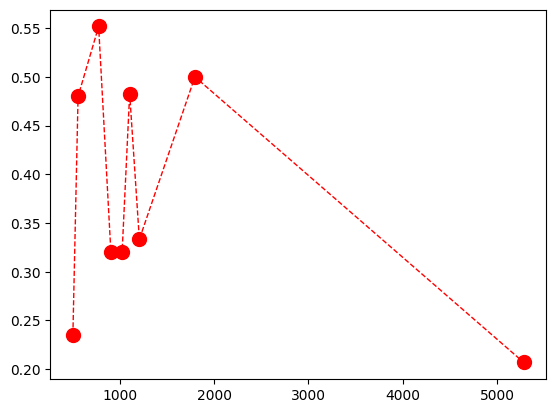

In [18]:
plt.plot(sorted(y), x[y.argsort()],
         color='red', marker='o', linestyle='dashed',
         linewidth=1, markersize=10)

В целом трудно выявить как таковую зависимость между длиной текста и точностью предсказания, однако на очень большом тексте (больше 5000 символов) f1 показывает очень маленькое значение.

# Вывод по работе (задание 8 и 9)

Gigachat делает не очень точные предсказывания (максимальное полученное значение f1 = 0.55172414) даже на небольших статьях. Иногда возникали проблемы с обработкой тех текстов, где могли встречаться темы, запрещенные GigaChat'ом для обсуждения (например, Gigachat отказывался делать анализ текста, в котором встречалось слово "Киев"). Самое низкое значение по f1 модель показала на самом первом тексте, длина которого составляет 5000 символов. К слову, при обработке очень больших текстов  возникала следующая проблема: поскольку длина максимально возможного сообщения в телеграмме составляет 4096 символов, то бот не мог обрабатывать большой текст чисто физически, поэтому для решения поставленной задачи использовался веб-интерфейс GigaChat.  

Для того, чтобы повысить метрики, необходимо, по моему мнению, использовать больше данных, а так же можно прибегнуть к использованию предсказаний нескольких LLM (вместе с GigaChat).

Таким образом, в результате выполнения работы мною был получен опыт работы с GigaChat как языковой модели для Named Entity Recognition, была реализована метрика f-beta с нуля для того, чтобы оценить качество предсказания, были созданы unit-тесты для того, чтобы убедиться в корректности работы функции, был произведен анализ предсказаний модели и построен график зависимости f1 от длины текста.